# Machine Learning

## K-Means - Agrupamento de Dados

In [1]:
# Carregando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Carregando base de dados

dados = pd.read_csv('iris.csv')

In [3]:
# Visualizando os dados

dados.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


**Separando os dados em previsores e classes**

In [4]:
# Separando os dados

previsores = dados.drop('Species', axis = 1)
classes = dados.Species

**Convertendo os valores categóricos das classes em numéricos**

In [5]:
# Criando função para conversão

def converte(x):
    if x == 'Iris-virginica':
        return 0
    elif x == 'Iris-setosa':
        return 1
    elif x == 'Iris-versicolor':
        return 2

In [6]:
# Aplicando a função nas classes

classes = classes.apply(converte)

In [7]:
# Verificando o resultado

classes.value_counts()

1    50
2    50
0    50
Name: Species, dtype: int64

**Instânciando o K-Means: definindo número de clusters igual a 3**

In [8]:
# Instânciando o modelo

modelo = KMeans(n_clusters = 3, init = 'random')

In [9]:
# Treinando o modelo

modelo.fit(previsores)

KMeans(init='random', n_clusters=3)

**Agrupando novos dados e realizando predição**

In [10]:
# Novos dados

dados_2 = [[4.12, 3.4, 1.6, 0.7], 
           [5.2, 5.8, 5.2, 6.7], 
           [3.1, 3.5, 3.3, 3.0]]

In [11]:
# Realizando a predição

modelo.predict(dados_2)

array([2, 1, 0], dtype=int32)

### Técnicas de Validação

**Matriz de Confusão**

In [12]:
print(pd.crosstab(classes, modelo.labels_, rownames = ['Real'], colnames = ['         Predito'], margins = True))

         Predito   0   1   2  All
Real                             
0                 14  36   0   50
1                  0   0  50   50
2                 48   2   0   50
All               62  38  50  150


**Métricas de Validação**

In [13]:
from sklearn import metrics
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']
print(metrics.classification_report(classes, modelo.labels_, target_names = clusters))

              precision    recall  f1-score   support

   Cluster 0       0.23      0.28      0.25        50
   Cluster 1       0.00      0.00      0.00        50
   Cluster 2       0.00      0.00      0.00        50

    accuracy                           0.09       150
   macro avg       0.08      0.09      0.08       150
weighted avg       0.08      0.09      0.08       150



### Visualizando os resultados gráficamente

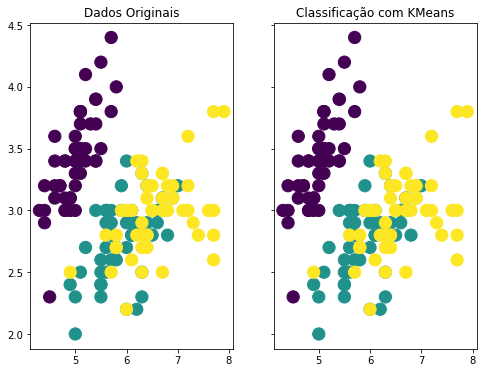

In [14]:
# Gráfico 1

%matplotlib inline

f, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (8, 6))

# Gráfic 1.1
ax1.set_title('Dados Originais') # Definindo título do gráfico 1.1
ax1.scatter(previsores['SepalLength'], previsores['SepalWidth'], s = 150, c = sorted(classes));

# Gráfico 1.2
ax2.set_title('Classificação com KMeans') # Definindo título do gráfico 1.2
ax2.scatter(previsores['SepalLength'], previsores['SepalWidth'], s = 150, c = sorted(classes));

**Centroids**

In [15]:
# Visualizando os valores dos centroids

modelo.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

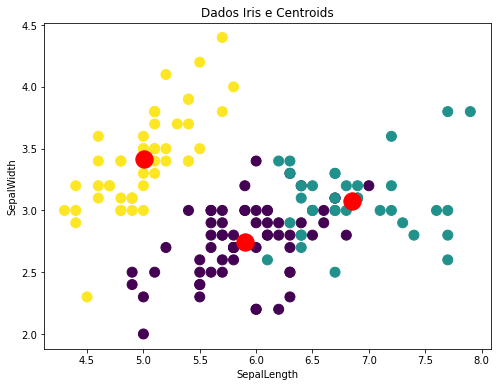

In [16]:
# Visualizando os centroids graficamente

%matplotlib inline

plt.figure(figsize = (8, 6)) # Definindo o tamanho da figura

# Configurando gráficos
plt.scatter(previsores['SepalLength'], previsores['SepalWidth'], s = 100, c = modelo.labels_)
plt.scatter(modelo.cluster_centers_[:, 0], modelo.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')

# Título e labels
plt.title('Dados Iris e Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')

# Plote
plt.show();

### Método Elbow - Estimando o valor do parâmetro K

* **Útil para decidir o número de clusters a se usar;**
* **Em alguns casos, considere o número de classes que contém o banco de dados ou que se deseja classificar.**

1 680.8243999999996
2 152.36870647733915
3 78.94084142614601
4 57.317873214285726
5 46.535582051282034
6 41.79530692640694
7 36.84379834054837
8 32.59054001554
9 29.22182037815127
10 27.183745750465572


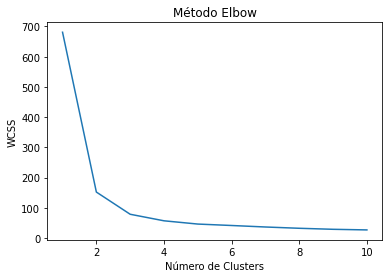

In [17]:
%matplotlib inline

# Within Clusters Sum of Squares
wcss = [] # Criando uma lista vazia


for i in range(1, 11):
    modelo_2 = KMeans(n_clusters = i, init = 'random')
    modelo_2.fit(previsores)
    print(i, modelo_2.inertia_)
    wcss.append(modelo_2.inertia_)
    
plt.plot(range(1, 11), wcss)     # Percorrendo os valores da lista e plotando valores
plt.title('Método Elbow')        # Definindo o título do gráfico
plt.xlabel('Número de Clusters') # Definindo o título do eixo x
plt.ylabel('WCSS')               # Definindo o título do eixo y
plt.show;                        # Plotando o gráfico